# Homework 1
## Yichi Zhang
## UNI:yz3716

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv('../aml_data/fire_nrt_V1_96617.csv')

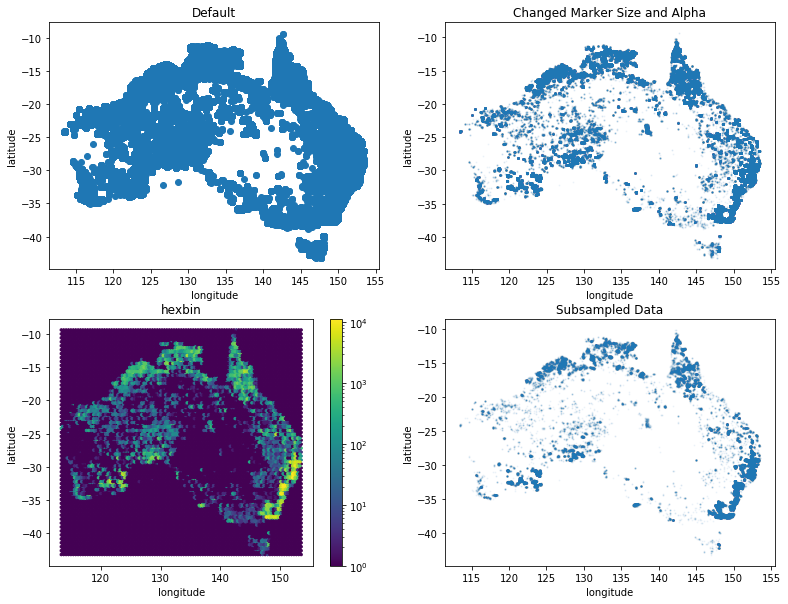

In [3]:
##Task 1




##1.1

fig,ax = plt.subplots(2,2, figsize=(13,10))

ax[0,0].scatter(df['longitude'],df['latitude'])

ax[0,1].scatter(df['longitude'],df['latitude'],alpha = .05,s=1)

img = ax[1,0].hexbin(df['longitude'],df['latitude'], bins='log')
fig.colorbar(img,ax = ax[1,0])

dfR = df.sample(100000)
ax[1,1].scatter(dfR['longitude'],dfR['latitude'],alpha = .05,s=1)


ax[0,0].set_title('Default')
ax[0,1].set_title('Changed Marker Size and Alpha')
ax[1,0].set_title('hexbin')
ax[1,1].set_title('Subsampled Data')
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
plt.show()


## 1.2 In what areas are most of the anomalies (measurements) located?
According to the four graphs we plotted above, we can see that most of anomalies located at the southerneast of Australia. Since there are many points with more than 10^4 anomalies located at that area. After we subsample the dataset in fourth plot, we can see that, except the southerneast of Australia, there are relatively more anomalies located at north and southwestern of Australia.
Therefore, most of anomalies located at Southeastern, North, and Southwestern of Australia

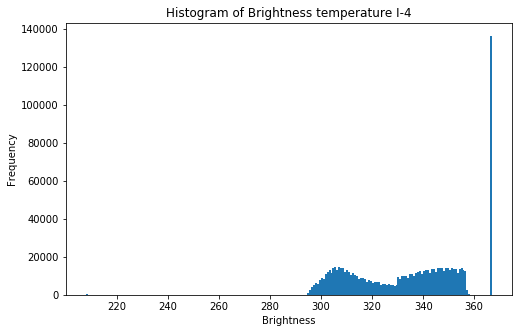

In [4]:
##Task 2
fig,ax = plt.subplots(1,1, figsize=(8,5))
ax.hist(df['bright_ti4'], bins="auto")
ax.set_xlabel('Brightness')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Brightness temperature I-4')

plt.show()

##According to the graph below, we define the a brightness as saturated if its brightness higher than 360.

In [5]:
Saturated = df[df['bright_ti4'] > 360]
UnSaturated = df[df['bright_ti4'] <= 360]

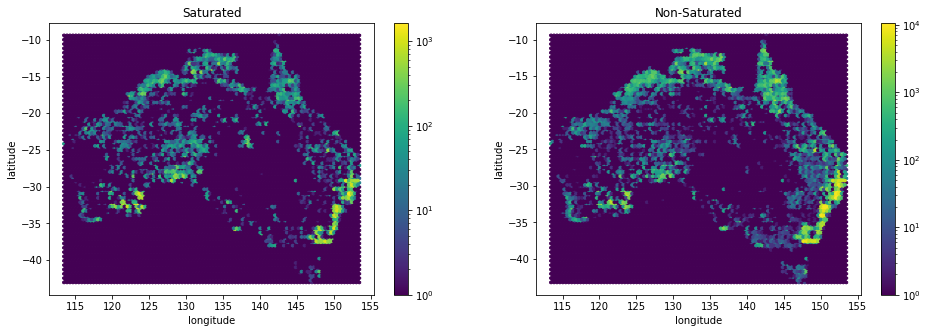

In [6]:
##2.1


fig,ax = plt.subplots(1,2, figsize=(16,5))


im1 = ax[0].hexbin(Saturated['longitude'],Saturated['latitude'],bins = 'log')
fig.colorbar(im1,ax = ax[0])

im2 = ax[1].hexbin(UnSaturated['longitude'],UnSaturated['latitude'],bins = 'log')
fig.colorbar(im2,ax = ax[1])


ax[0].set_title('Saturated')
ax[1].set_title('Non-Saturated')


ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[1].set_xlabel('longitude')
ax[1].set_ylabel('latitude')

plt.show()

## Can you spot differences in the distributions?
According to the two graphs above, it is hard to say there is any difference between the distributions of two datasets. Both Saturated data and Non-saturated data located mostly at Southeastern, North, and Southwestern of Australia. However, according to the range of colorbar of two graphs. We can realize that the number of non-saturated data is much more than the number of saturated data

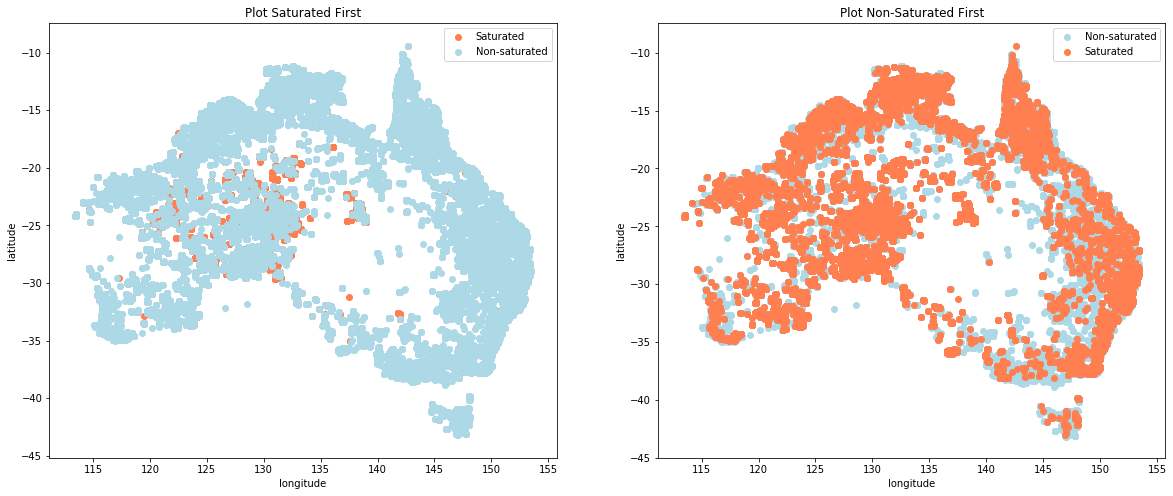

In [7]:
##2.2
fig,ax1 = plt.subplots(1,2, figsize=(20,8))

ax1[0].scatter(Saturated['longitude'],Saturated['latitude'],c = 'coral',label="Saturated")
ax1[0].scatter(UnSaturated['longitude'],UnSaturated['latitude'],c = 'lightblue',label="Non-saturated")
ax1[0].legend()

ax1[1].scatter(UnSaturated['longitude'],UnSaturated['latitude'],c = 'lightblue',label="Non-saturated")
ax1[1].scatter(Saturated['longitude'],Saturated['latitude'],c = 'coral',label="Saturated")

ax1[1].legend()

ax1[0].set_xlabel('longitude')
ax1[0].set_ylabel('latitude')
ax1[1].set_xlabel('longitude')
ax1[1].set_ylabel('latitude')
ax1[0].set_title('Plot Saturated First')
ax1[1].set_title('Plot Non-Saturated First')

plt.show()

## How does that impact the result?
According to the two graphs above, there is severe overlapping problem here. The data we plot later always cover the data we plot earlier. In the first graph, we can see the Non-saturated cover almost all Saturated data since the number of Non-saturated data is much more than the number of Saturated data. In the second graph, some Non-saturated data are covered by Saturated data. Therefore, we only can see the distirbution of the data we plot later. It is difficult to see the distribution of the data we plot first.

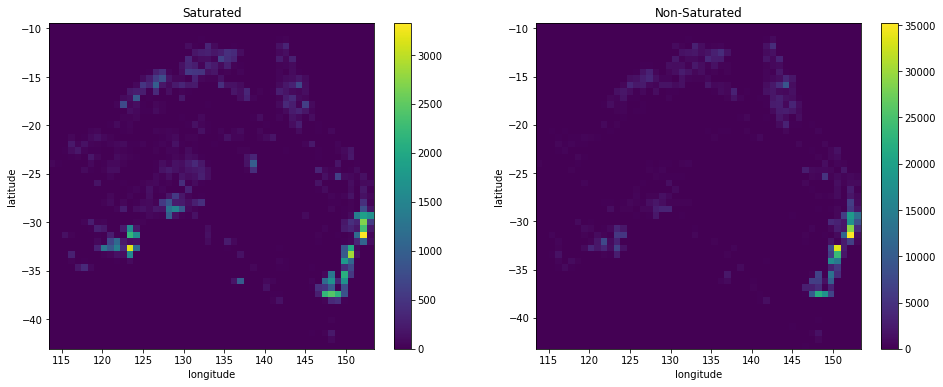

In [8]:
##2.3
fig,ax1 = plt.subplots(1,2, figsize=(16,6))

H = ax1[0].hist2d(Saturated['longitude'],Saturated['latitude'],bins = 50)
fig.colorbar(H[3], ax=ax1[0])

H = ax1[1].hist2d(UnSaturated['longitude'],UnSaturated['latitude'],bins = 50)
fig.colorbar(H[3], ax=ax1[1])



ax1[0].set_title('Saturated')
ax1[1].set_title('Non-Saturated')
ax1[0].set_xlabel('longitude')
ax1[0].set_ylabel('latitude')
ax1[1].set_xlabel('longitude')
ax1[1].set_ylabel('latitude')
plt.show()

## Can you find a better way to compare the two distributions?(graphs above)
I chose the hist2d to plot two different heatmaps to compare the distirbution of Saturated data and Non-saturated data. I chose bins equal to 50 instead of setting it to 'log' as before which helps me locate the area with most anomalies easier. Then there is a little more information here. We can see that most of anomalies measurement in Saturated data located at Southeastern, Southwestern, and central of Australia. However, most of anomaliers measurement in Non-saturated data located only at Southeastern of Australia.